In [20]:
import pandas as pd

# Open CEDS SO2 emissions by country sector 
file_path = '/Users/jack/Documents/CESM2/CEDS/CEDS_v_2024_04_01_aggregate/SO2_CEDS_emissions_by_country_sector_v2024_04_01.csv'
df = pd.read_csv(file_path)

# Rename year columns: strip 'X' and convert to int
def rename_col(c):
    if c.startswith('X'):
        return int(c[1:])
    else:
        return c

df = df.rename(columns=rename_col)

In [21]:
def get_country_df(df, country_code):
    # Step 1: Filter for country
    country_df = df[df["country"] == country_code].reset_index(drop=True)
    
    # Step 2: Keep only the year columns
    year_cols = ['sector'] + [c for c in df.columns if isinstance(c, int) and 1850 <= c <= 2015]
    country_df = country_df[year_cols]
    
    # Step 3: Convert from kt SO2 → kt S
    return country_df

df_china        = get_country_df(df, "chn")
df_japan        = get_country_df(df, "jpn")
df_south_korea  = get_country_df(df, "kor")

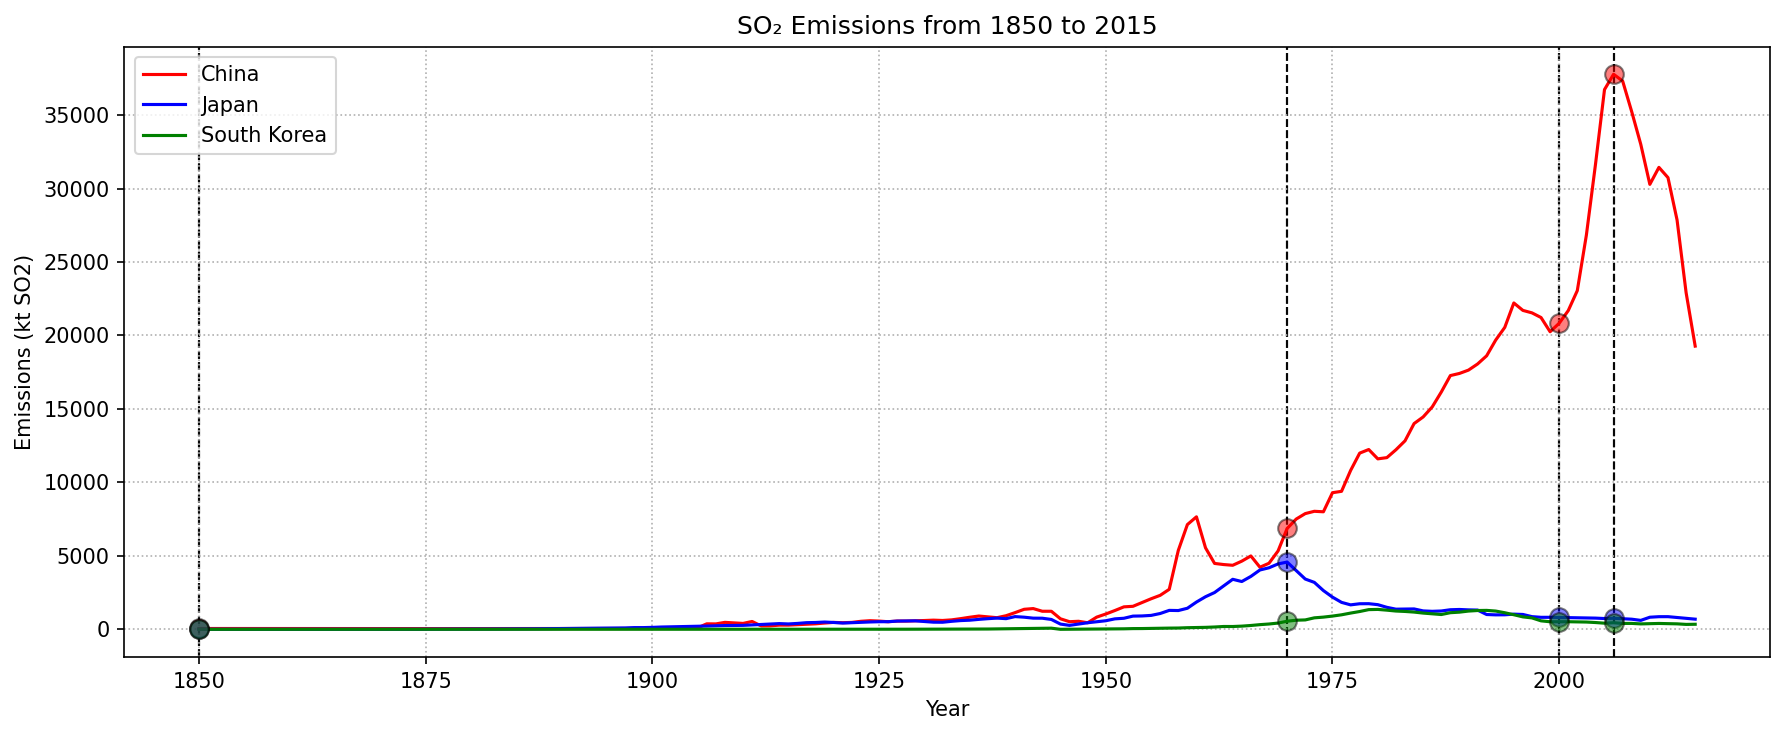

In [23]:
from matplotlib import pyplot as plt

# Years to mark
highlight_years = [1850, 1970, 2000, 2006]

# Helper: get the list of year columns (ints)
def year_cols(df_):
    return [c for c in df_.columns if isinstance(c, int)]

# Country totals (sum across sectors → 1 value per year)
china_totals = df_china[year_cols(df_china)].sum(axis=0)
japan_totals = df_japan[year_cols(df_japan)].sum(axis=0)
skorea_totals = df_south_korea[year_cols(df_south_korea)].sum(axis=0)

plt.figure(figsize=(12, 5), dpi=150)

# Plot lines (x = years, y = totals)
plt.plot(china_totals.index,  china_totals.values,  label='China',        color='red')
plt.plot(japan_totals.index,  japan_totals.values,  label='Japan',        color='blue')
plt.plot(skorea_totals.index, skorea_totals.values, label='South Korea',  color='green')

# Add markers for specific years
for year in highlight_years:
    if year in china_totals.index:
        plt.scatter(year, china_totals.loc[year],  color='red',   edgecolor='black', s=80, zorder=5, alpha=0.5)
        plt.axvline(x=year, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)
    if year in japan_totals.index:
        plt.scatter(year, japan_totals.loc[year],  color='blue',  edgecolor='black', s=80, zorder=5, alpha=0.5)
        plt.axvline(x=year, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)
    if year in skorea_totals.index:
        plt.scatter(year, skorea_totals.loc[year], color='green', edgecolor='black', s=80, zorder=5, alpha=0.5)
        plt.axvline(x=year, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)

# Beautify
plt.title('SO₂ Emissions from 1850 to 2015')
plt.xlabel('Year')
plt.ylabel('Emissions (kt SO2)')
plt.legend(loc='upper left')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

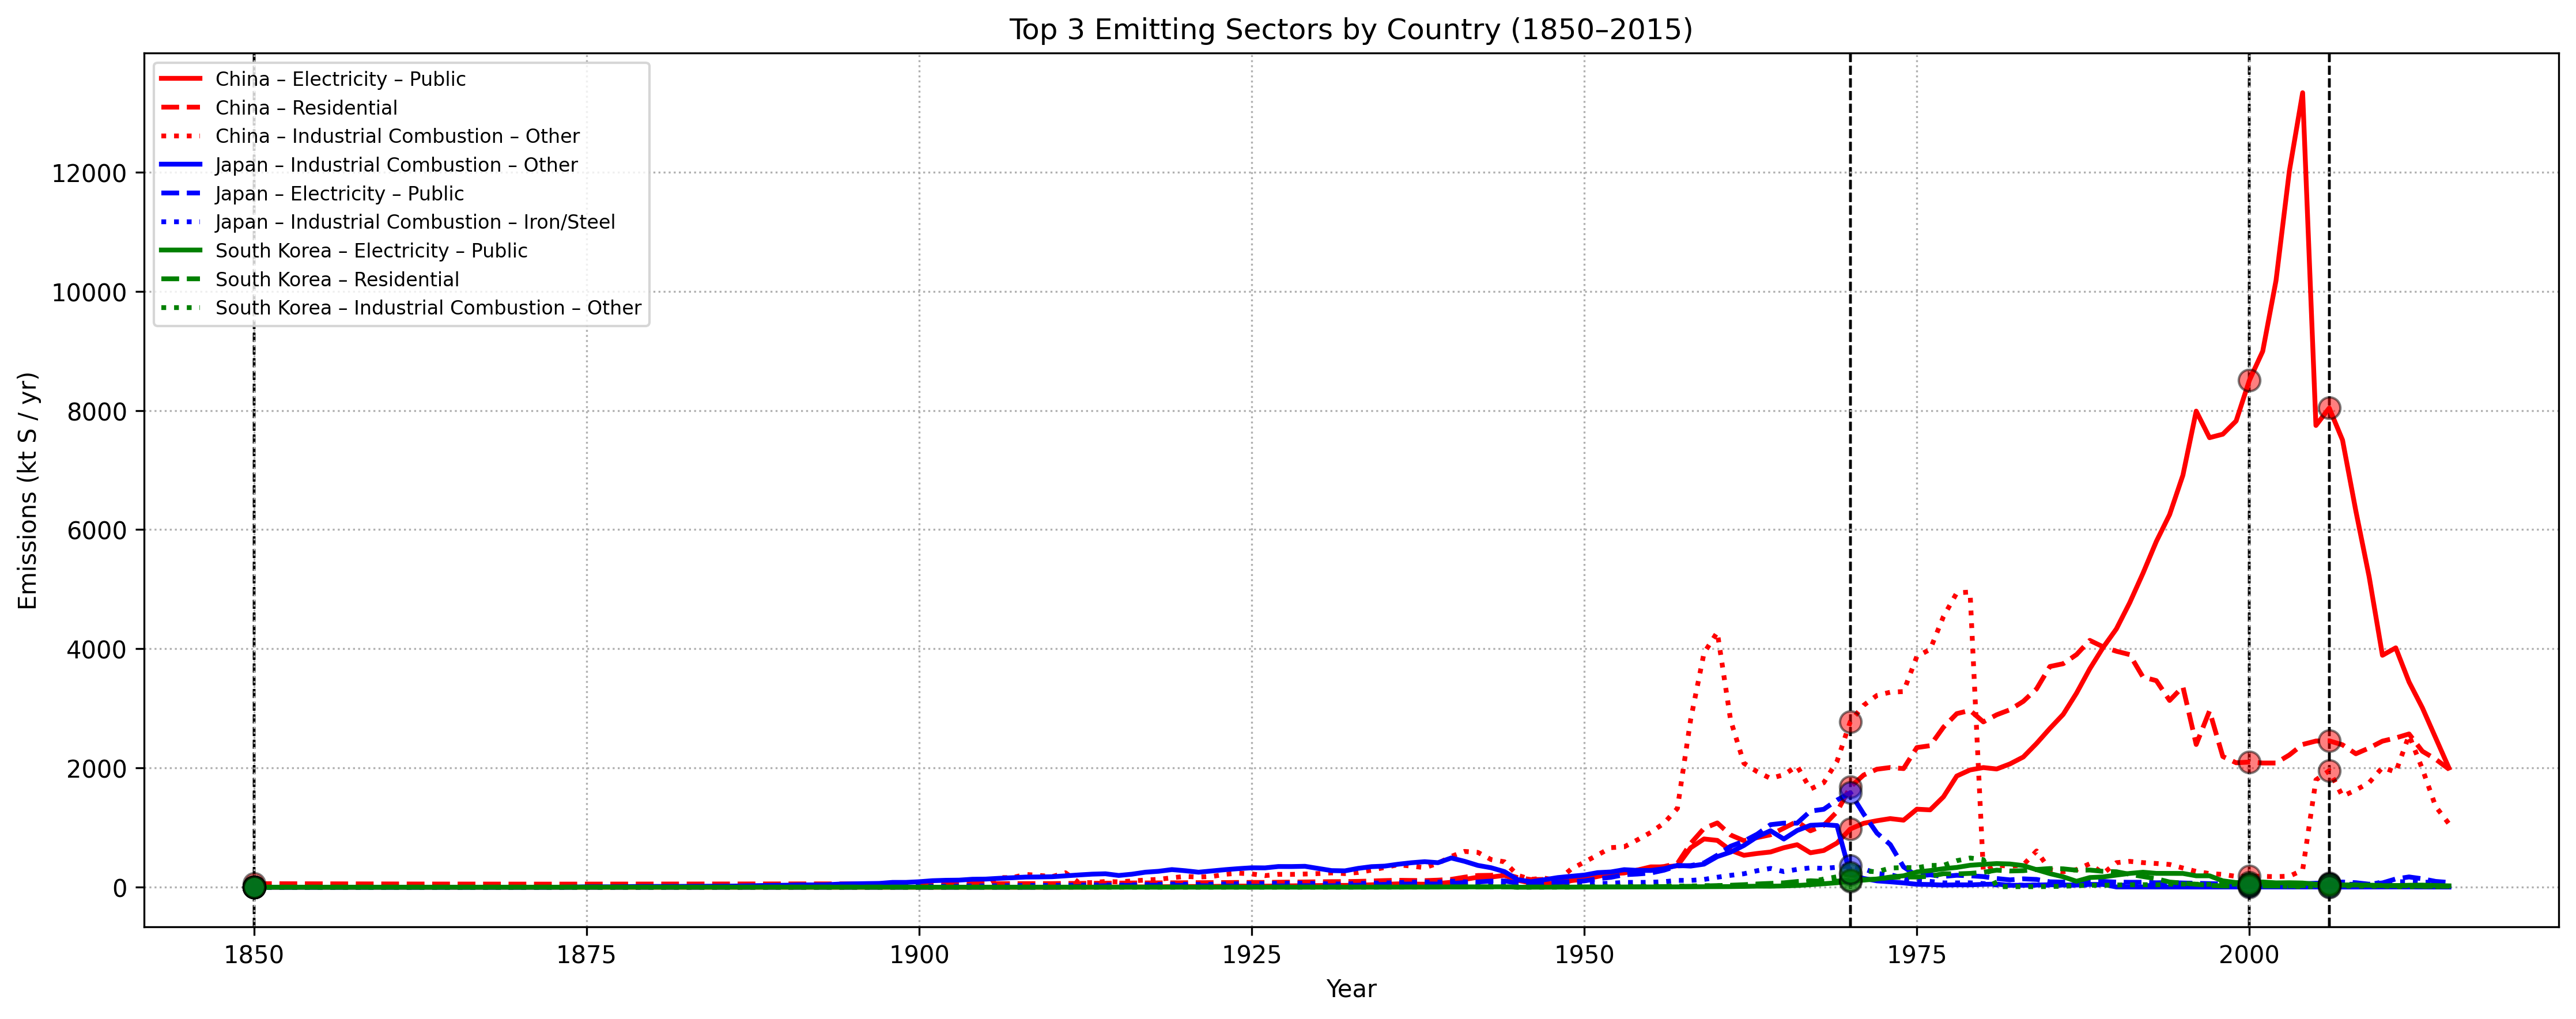

In [29]:
from matplotlib import pyplot as plt

# highlight specific years
highlight_years = [1850, 1970, 2000, 2006]

countries = {
    'China': df_china, 
    'Japan': df_japan, 
    'South Korea': df_south_korea
}

# mapping from CEDS sector code → pretty name
pretty_sector_names = {
    '1A1a_Electricity-public': "Electricity – Public",
    '1A4b_Residential': "Residential",
    '1A2g_Ind-Comb-other': "Industrial Combustion – Other",
    '1A2a_Ind-Comb-Iron-steel': "Industrial Combustion – Iron/Steel",
    '1A1a_Electricity-autoproducer': "Electricity – Autoproducer",
    '1A1a_Heat-production': "Heat Production",
    # add more as needed
}

# integer year columns once
years = sorted([c for c in df_china.columns if isinstance(c, int)])

line_styles = ['-', '--', ':']
colors = {'China': 'red', 'Japan': 'blue', 'South Korea': 'green'}

plt.figure(figsize=(15, 6), dpi=300)

for country_name, d in countries.items():
    d_idx = d.set_index('sector')
    totals = d_idx[years].sum(axis=1)
    top3 = totals.nlargest(3).index

    for i, sector in enumerate(top3):
        y = d_idx.loc[sector, years]

        # use pretty name if available, else raw sector
        sector_label = pretty_sector_names.get(sector, sector)

        plt.plot(
            years, y.values,
            label=f"{country_name} – {sector_label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[country_name],
            linewidth=2
        )

        for yr in highlight_years:
            if yr in y.index:
                plt.axvline(x=yr, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)
                plt.scatter(
                    yr, y.loc[yr],
                    color=colors[country_name],
                    edgecolor='black',
                    s=80,
                    zorder=5,
                    alpha=0.5
                )

# cosmetics
plt.title("Top 3 Emitting Sectors by Country (1850–2015)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt S / yr)")
plt.xticks([1850, 1875, 1900, 1925, 1950, 1975, 2000])
plt.grid(True, linestyle=':')
plt.legend(fontsize=8, loc='upper left')
plt.tight_layout()
plt.show()

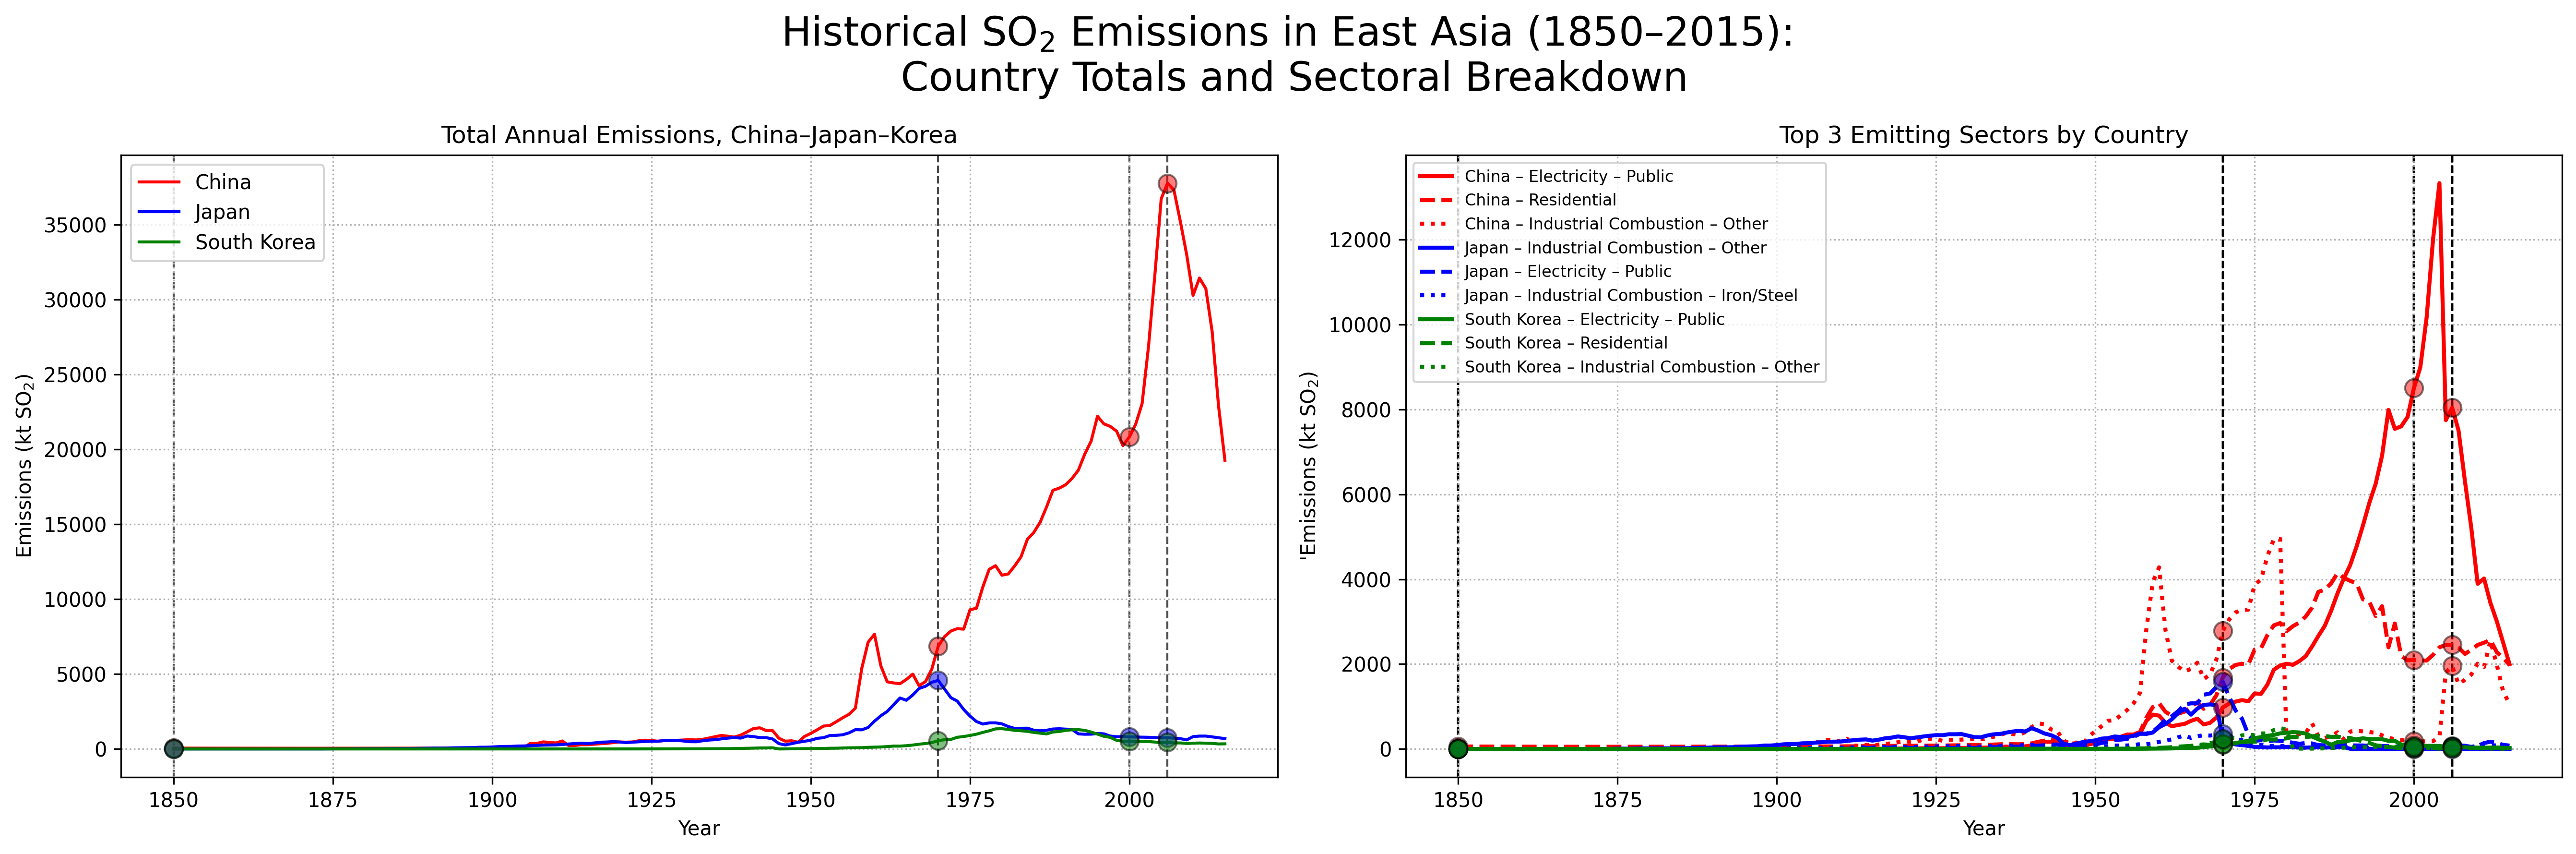

In [ ]:
from matplotlib import pyplot as plt

# Years to mark
highlight_years = [1850, 1970, 2000, 2006]

# Helper: get the list of year columns (ints)
def year_cols(df_):
    return [c for c in df_.columns if isinstance(c, int)]

# Country totals (sum across sectors → 1 value per year)
china_totals = df_china[year_cols(df_china)].sum(axis=0)
japan_totals = df_japan[year_cols(df_japan)].sum(axis=0)
skorea_totals = df_south_korea[year_cols(df_south_korea)].sum(axis=0)

# mapping from CEDS sector code → pretty name
pretty_sector_names = {
    '1A1a_Electricity-public': "Electricity – Public",
    '1A4b_Residential': "Residential",
    '1A2g_Ind-Comb-other': "Industrial Combustion – Other",
    '1A2a_Ind-Comb-Iron-steel': "Industrial Combustion – Iron/Steel",
    '1A1a_Electricity-autoproducer': "Electricity – Autoproducer",
    '1A1a_Heat-production': "Heat Production",
}

countries = {
    'China': df_china, 
    'Japan': df_japan, 
    'South Korea': df_south_korea
}

years = sorted([c for c in df_china.columns if isinstance(c, int)])
line_styles = ['-', '--', ':']
colors = {'China': 'red', 'Japan': 'blue', 'South Korea': 'green'}

# Create 1x2 subplot figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=300)

# --- First plot: country totals ---
ax = axes[0]
ax.plot(china_totals.index,  china_totals.values,  label='China',        color='red')
ax.plot(japan_totals.index,  japan_totals.values,  label='Japan',        color='blue')
ax.plot(skorea_totals.index, skorea_totals.values, label='South Korea',  color='green')

for year in highlight_years:
    if year in china_totals.index:
        ax.scatter(year, china_totals.loc[year],  color='red',   edgecolor='black', s=80, zorder=5, alpha=0.5)
    if year in japan_totals.index:
        ax.scatter(year, japan_totals.loc[year],  color='blue',  edgecolor='black', s=80, zorder=5, alpha=0.5)
    if year in skorea_totals.index:
        ax.scatter(year, skorea_totals.loc[year], color='green', edgecolor='black', s=80, zorder=5, alpha=0.5)
    ax.axvline(x=year, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)

ax.set_title('Total Annual Emissions, China–Japan–Korea')
ax.set_xlabel('Year')
ax.set_ylabel('Emissions (kt SO$_{2}$)')
ax.legend(loc='upper left')
ax.grid(True, linestyle=':')

# --- Second plot: top 3 sectors per country ---
ax = axes[1]
for country_name, d in countries.items():
    d_idx = d.set_index('sector')
    totals = d_idx[years].sum(axis=1)
    top3 = totals.nlargest(3).index

    for i, sector in enumerate(top3):
        y = d_idx.loc[sector, years]
        sector_label = pretty_sector_names.get(sector, sector)

        ax.plot(
            years, y.values,
            label=f"{country_name} – {sector_label}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[country_name],
            linewidth=2
        )

        for yr in highlight_years:
            if yr in y.index:
                ax.axvline(x=yr, color='black', linestyle='--', linewidth=1, alpha=0.7, zorder=0)
                ax.scatter(
                    yr, y.loc[yr],
                    color=colors[country_name],
                    edgecolor='black',
                    s=80,
                    zorder=5,
                    alpha=0.5
                )

ax.set_title("Top 3 Emitting Sectors by Country")
ax.set_xlabel("Year")
ax.set_ylabel("'Emissions (kt SO$_{2}$)")
ax.set_xticks([1850, 1875, 1900, 1925, 1950, 1975, 2000])
ax.grid(True, linestyle=':')
ax.legend(fontsize=8, loc='upper left')

fig.suptitle('Historical SO$_{2}$ Emissions in East Asia (1850–2015): \n Country Totals and Sectoral Breakdown', fontsize=20)
plt.tight_layout()
plt.show()